In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, filters
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift


SEMANA 1

<ipython-input-4-42e816eea764>:19: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gaussian_human = filters.gaussian(human, sigma)
<ipython-input-4-42e816eea764>:23: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  low_pass_cat = filters.gaussian(cat, sigma)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


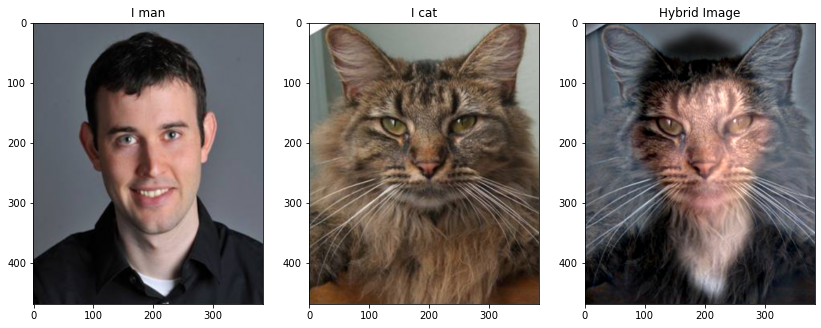

In [4]:


# LOAD IMAGES
cat = io.imread('DATA_2012_2013_PDI_P1/cat.png')
human = io.imread('DATA_2012_2013_PDI_P1/human.png')

# RESIZE
size1 = int(round(cat.shape[0] * (4/3.)))
size2 = int(round(cat.shape[1] * (4/3.)))
cat = transform.resize(cat, (size1, size2))

# RESIZE HUMAN IMAGE TO MATCH CAT DIMENSIONS
human = transform.resize(human, cat.shape, anti_aliasing=True)

# CONVERT TO GRAYSCALE
cat_gray = color.rgb2gray(cat)
human_gray = color.rgb2gray(human)

# APPLY GAUSSIAN FILTER TO HUMAN IMAGE (ILP)
sigma = 9
gaussian_human = filters.gaussian(human, sigma)

# OBTAIN HIGH-PASS IMAGE FROM CAT (IHP)
# Subtract the original image from the low-pass version
low_pass_cat = filters.gaussian(cat, sigma)
high_pass_cat = cat - low_pass_cat

# CREATE HYBRID IMAGE
hybrid_image = gaussian_human + high_pass_cat  # You can choose either high_pass_cat or inverted_gaussian_cat

# VISUALIZATION
plt.figure(1)
plt.subplot(131)
plt.imshow(human, cmap="gray")
plt.title('I man')
plt.subplot(132)
plt.imshow(cat, cmap="gray")
plt.title('I cat')
plt.subplot(133)
plt.imshow(hybrid_image, cmap="gray")
plt.title('Hybrid Image')
plt.gcf().set_size_inches((14, 14))

plt.show()


SEMANA 2

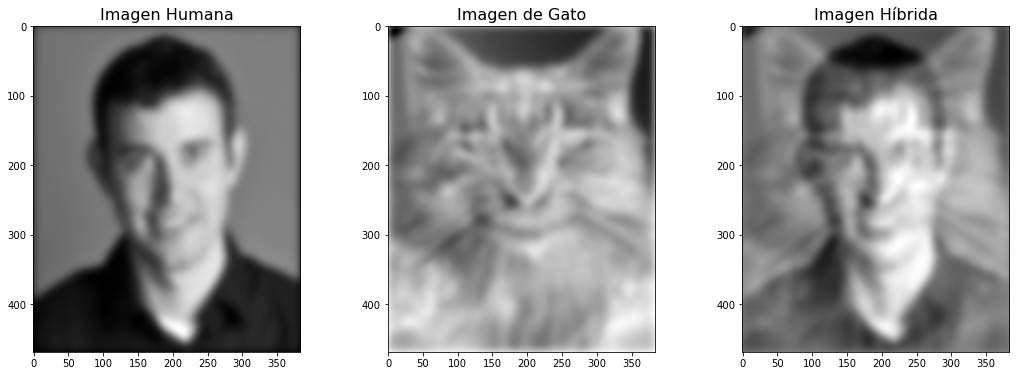

In [12]:
from scipy import fftpack

fftsize = 1024
im_fft = fftpack.fft2(human_gray, (fftsize, fftsize))

#Gaussian filter
SZ = 50
[xx,yy]=np.meshgrid(np.linspace(-4,4,SZ),np.linspace(-4,4,SZ))
gaussian = np.exp(-0.5*(xx*xx+yy*yy))
fil = gaussian/np.sum(gaussian)

fil_fft = fftpack.fft2(fil, (fftsize, fftsize)) 

im_fil_fft = im_fft * fil_fft

im_fil = np.real(fftpack.ifft2(im_fil_fft))

hs=int(np.floor(SZ/2.))
human_lp = im_fil[hs:human_gray.shape[0]+hs, hs:human_gray.shape[1]+hs]


im_fft = fftpack.fft2(cat_gray, (fftsize, fftsize))

#Gaussian filter
SZ = 50
[xx,yy]=np.meshgrid(np.linspace(-4,4,SZ),np.linspace(-4,4,SZ))
gaussian = np.exp(-0.5*(xx*xx+yy*yy))
fil = gaussian/np.sum(gaussian)

fil_fft = fftpack.fft2(fil, (fftsize, fftsize)) 

im_fil_fft = im_fft * fil_fft

im_fil = np.real(fftpack.ifft2(im_fil_fft))

hs=int(np.floor(SZ/2.))
cat_hp = im_fil[hs:cat_gray.shape[0]+hs, hs:cat_gray.shape[1]+hs]
cat_hp = 1 - cat_hp


hybrid = cat_hp + human_lp
# Mostrar las imágenes originales y la imagen híbrida
plt.subplot(1, 3, 1)
plt.imshow(human_lp, cmap="gray")
plt.title('Imagen Humana', size=16)

plt.subplot(1, 3, 2)
plt.imshow(cat_hp, cmap="gray")
plt.title ('Imagen de Gato', size=16)

plt.subplot(1, 3, 3)
plt.imshow(hybrid, cmap="gray")
plt.title('Imagen Híbrida', size=16)

plt.gcf().set_size_inches((18, 6))
plt.show()

Esto han sido pruebas y otras maneras que he probado durante el desenvolupamiento de la pràctica

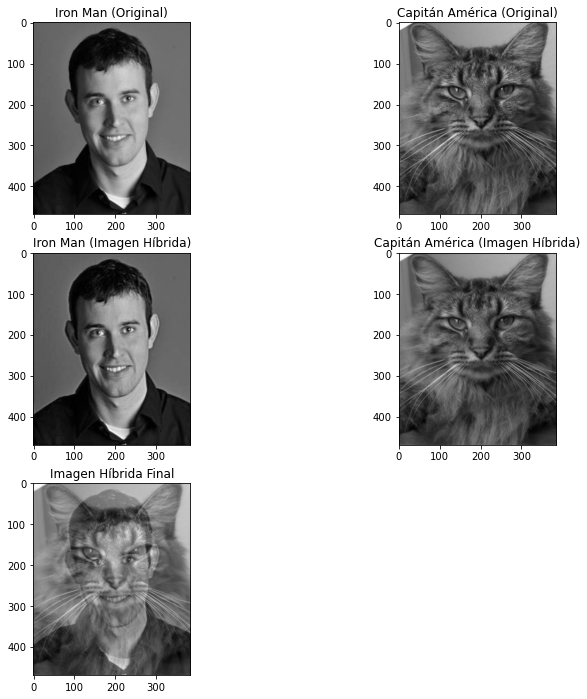

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, filters
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift


# Convertir las imágenes a escala de grises
human_gray = color.rgb2gray(human)
cat_gray = color.rgb2gray(cat)

# Asegurarnos de que ambas imágenes tengan el mismo tamaño
if human_gray.shape != cat_gray.shape:
    # Redimensionar una de las imágenes para que tengan el mismo tamaño
    cat_gray = transform.resize(cat_gray, human_gray.shape, mode='reflect')

# Transformada de Fourier 2D para ambas imágenes en escala de grises
ironman_fft = fft2(human_gray)
capitanamerica_fft = fft2(cat_gray)
s
# Crear un filtro pasabajos y un filtro pasaaltos del mismo tamaño que las imágenes
# Puedes ajustar los parámetros del filtro según tus necesidades
lp_filter = filters.gaussian(human_gray, sigma=10)
hp_filter = 1 - lp_filter

# Aplicar los filtros a las imágenes en el dominio de la frecuencia
hybrid_ironman_fft = ironman_fft * fftshift(lp_filter)
hybrid_capitanamerica_fft = capitanamerica_fft * fftshift(hp_filter)

# Transformada inversa de Fourier para obtener las imágenes híbridas en el dominio espacial
hybrid_ironman = np.abs(ifft2(ifftshift(hybrid_ironman_fft)))
hybrid_capitanamerica = np.abs(ifft2(ifftshift(hybrid_capitanamerica_fft)))

# Combina las dos imágenes híbridas para crear la imagen híbrida final
hybrid_image = hybrid_ironman + hybrid_capitanamerica

# Mostrar las imágenes en diferentes etapas
plt.figure(figsize=(12, 12))

plt.subplot(321)
plt.title("Iron Man (Original)")
plt.imshow(ironman_gray, cmap='gray')

plt.subplot(322)
plt.title("Capitán América (Original)")
plt.imshow(capitanamerica_gray, cmap='gray')

plt.subplot(323)
plt.title("Iron Man (Imagen Híbrida)")
plt.imshow(hybrid_ironman, cmap='gray')

plt.subplot(324)
plt.title("Capitán América (Imagen Híbrida)")
plt.imshow(hybrid_capitanamerica, cmap='gray')

plt.subplot(325)
plt.title("Imagen Híbrida Final")
plt.imshow(hybrid_image, cmap='gray')

plt.show()
